In [15]:

import pandas as pd
import os
import matplotlib.pyplot as plt
data = "D:\\pyhton\\du an\\Sales-Reporting-main\\data\\"

filename=data+input('please key in file name')
df=pd.read_csv(filename)
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [8]:
def read_csv_file():
    data = "D:\\pyhton\\du an\\Sales-Reporting-main\\data\\"
    filename = data + input('Please enter the file name: ')
    df = pd.read_csv(filename)
    return df.head(10)
print( read_csv_file())

  Order ID                     Product Quantity Ordered Price Each  \
0   141234                      iPhone                1        700   
1   141235    Lightning Charging Cable                1      14.95   
2   141236            Wired Headphones                2      11.99   
3   141237            27in FHD Monitor                1     149.99   
4   141238            Wired Headphones                1      11.99   
5   141239      AAA Batteries (4-pack)                1       2.99   
6   141240      27in 4K Gaming Monitor                1     389.99   
7   141241        USB-C Charging Cable                1      11.95   
8   141242  Bose SoundSport Headphones                1      99.99   
9   141243    Apple Airpods Headphones                1        150   

       Order Date                         Purchase Address  
0  01/22/19 21:25          944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15         185 Maple St, Portland, OR 97035  
2  01/17/19 13:33    538 Adams St, San Francis

In [16]:

"""
data = "D:\\pyhton\\du an\\Sales-Reporting-main\\data\\"

fame=[]
for i in os.listdir(data):
    if i.endswith('.csv'):
        filedata=data+i
        df = pd.read_csv(filedata)
        fame.append(df)
        resut=pd.concat(fame)
df=resut
df.to_csv("toanreport.csv",index=False)
"""

'\ndata = "D:\\pyhton\\du an\\Sales-Reporting-main\\data\\"\n\nfame=[]\nfor i in os.listdir(data):\n    if i.endswith(\'.csv\'):\n        filedata=data+i\n        df = pd.read_csv(filedata)\n        fame.append(df)\n        resut=pd.concat(fame)\ndf=resut\ndf.to_csv("toanreport.csv",index=False)\n'

## order dateから切り取る

In [17]:
## cat thang tu cot order date
df['month']=df['Order Date'].str.slice(0,2)
## ナンとorという価値を消える
df.dropna(how="all",inplace=True)
df=df[df['month']!='Or']
print(set(df['month']))


{'01', '02'}


## 一番売れ切った月は

In [29]:
def moth():
    df['Sales']=df['Quantity Ordered'].astype(int)*df['Price Each'].astype(float)
    moving_colums=df.pop('Sales')
    df.insert(4,'Sales',moving_colums)
    #tinh max cua thang
    valuses=df.groupby('month')['Sales'].sum()
    valuses_sorted_month=valuses.sort_values(ascending=False)
    max_month=valuses_sorted_month.iloc[0]
    print("一番売れ切った月は{}月に{}回を売った".format(valuses_sorted_month.index[0],max_month))
moth()


一番売れ切った月は01月に1813586.44回を売った


## 月のグラフを描く

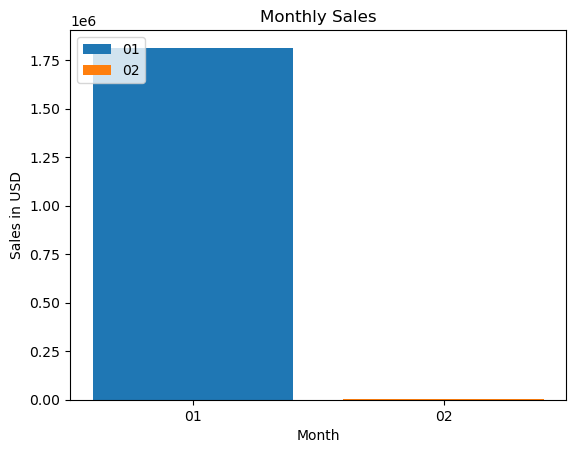

None


In [41]:
   
def map_bar():

    # Tạo danh sách các tháng
    months = sorted(set(df['month']))
    # Duyệt qua từng tháng và vẽ biểu đồ cho mỗi tháng
    for month in months:
        # Lọc dữ liệu cho tháng hiện tại
        data = df[df['month'] == month]
        # Tính tổng doanh thu của tháng
        total_sales = data['Sales'].sum()
        # Vẽ biểu đồ
        plt.bar(x=month, height=total_sales)
        
    # Cấu hình trục x
    plt.xticks(months)
    plt.xlabel('Month')

    # Cấu hình trục y
    plt.ylabel('Sales in USD')

    # Thiết lập tiêu đề cho biểu đồ
    plt.title('Monthly Sales')

    # Hiển thị legend
    plt.legend(months, loc='upper left')

    # Hiển thị biểu đồ
    print(plt.show())
map_bar()

##　一番売れ切った町は



In [36]:

valusescity = None

def cityvaluse():   
    dress_city = lambda x: x.split(',')[1]
    df['city'] = df['Purchase Address'].apply(dress_city)
    global valusescity
    valusescity = df.groupby('city')['Sales'].sum()
    
    sorted_values_city = valusescity.sort_values(ascending=False)
    max_city = sorted_values_city.iloc[0]
    print("一番売れ切った町は{}町{}回を売っています".format(sorted_values_city.index[0], max_city))
cityvaluse()


一番売れ切った町は San Francisco町433103.45回を売っています


## 町の価値を描く


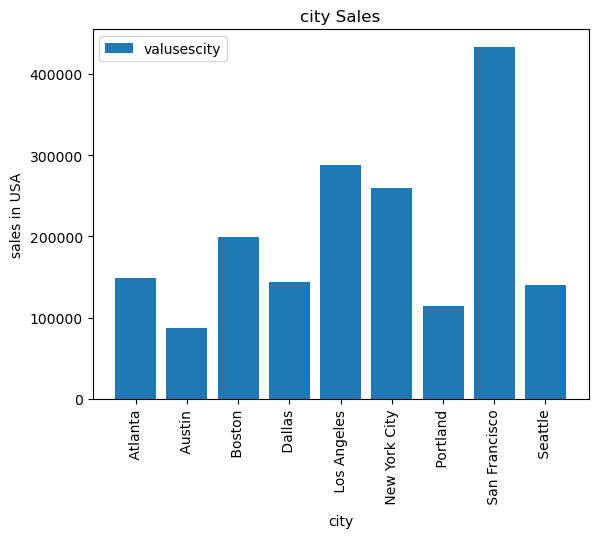

None


In [33]:
def map_city():    
    cityes=[city for city,sale in valusescity.items()]
    plt.bar(x=cityes,height=valusescity)
    plt.xticks(cityes,rotation=90)
    plt.xlabel('city')
    plt.ylabel('sales in USA')
    plt.title('city Sales')
    plt.legend(['valusescity'],loc='upper left')
    print(plt.show())
map_city()

## 広告をするときにいいタイミングは

In [38]:
valuestime=None
def time_valuse():    
    df['hour'] = pd.to_datetime(df['Order Date']).dt.hour
    global valuestime
    valusestime = df.groupby('hour')['Sales'].count()
    sorted_values = valusestime.sort_values(ascending=False)
    max1 = sorted_values.iloc[0]
    max2 = sorted_values.iloc[1]
    print("max1は {}時{}回".format(sorted_values.index[1], max2))
    print("max2は {}時{}回".format(sorted_values.index[0], max1))
time_valuse()

max1は 19時657回
max2は 12時670回


## 時間のグラフを描く

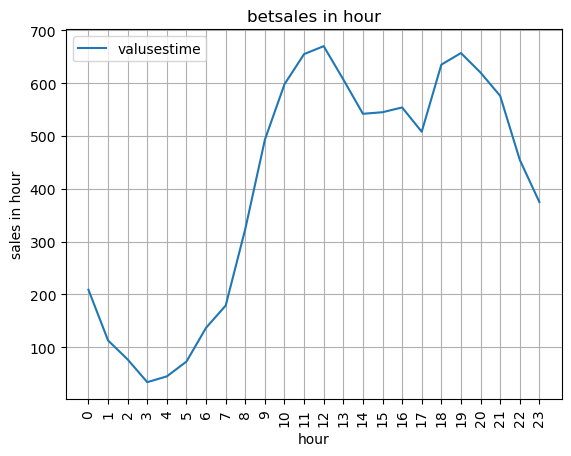

None


In [40]:
def map_time():
    houres=[hour for hour,sale in valusestime.items()]
    plt.plot(houres,valusestime)
    plt.xticks(houres,rotation=90)
    plt.xlabel('hour')
    plt.ylabel('sales in hour')
    plt.title('betsales in hour')
    plt.grid()
    plt.legend(['valusestime'],loc='upper left')
    print(plt.show())
map_time()

## 商品が一緒によく売られていますか

In [43]:
def produc_valuse():   
    df_dup=df[df['Order ID'].duplicated(keep=False)]
    df_dup['all product']=df_dup.groupby('Order ID')['Product'].transform(','.join)
    df_dup=df_dup[['Order ID','all product']].drop_duplicates()
    print(df_dup['all product'].value_counts())
produc_valuse()


iPhone,Lightning Charging Cable                   55
Google Phone,USB-C Charging Cable                 51
iPhone,Wired Headphones                           29
Google Phone,Wired Headphones                     23
Vareebadd Phone,USB-C Charging Cable              15
                                                  ..
Apple Airpods Headphones,AA Batteries (4-pack)     1
Flatscreen TV,USB-C Charging Cable                 1
27in FHD Monitor,Lightning Charging Cable          1
27in 4K Gaming Monitor,iPhone                      1
Flatscreen TV,Google Phone                         1
Name: all product, Length: 123, dtype: int64


C:\Users\MSI GL63\AppData\Local\Temp\ipykernel_1748\2305096659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['all product']=df_dup.groupby('Order ID')['Product'].transform(','.join)


## 一番売れ切った商品は


In [45]:
all_products=None
def produc_max():
    df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)
    global all_products
    all_products=df.groupby('Product')['Quantity Ordered'].sum()
    valuse_sorted_produc=all_products.sort_values(ascending=False)
    max=valuse_sorted_produc.iloc[0]
    print('一番売れ切った商品は{},そして商品が{}品です'.format(valuse_sorted_produc.index[0],max))
produc_max()

一番売れ切った商品はAAA Batteries (4-pack),そして商品が1596.0品です


## 商品のグラフを描く

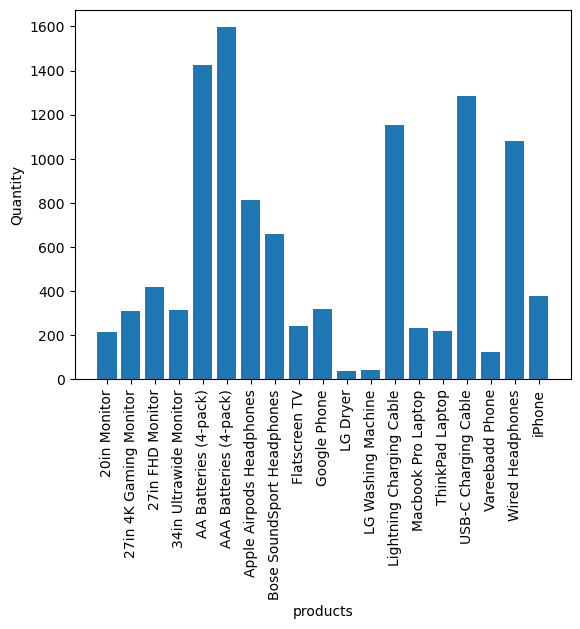

None


In [47]:
produc_i=None
def map_produc(): 
    global produc_i
    produc_i=[produc for produc,quan in all_products.items()]
    plt.bar(x=produc_i,height=all_products)
    plt.xticks(produc_i,rotation=90)
    plt.xlabel("products")
    plt.ylabel('Quantity')
    print(plt.show())
map_produc()

## 一番値段が高い

In [50]:
price=None
def price_valuse():
    df['Price Each']= df['Price Each'].astype(float)
    global price
    price=df.groupby('Product')['Price Each'].mean()
    valuse_sorted_price=price.sort_values(ascending=False)
    max=valuse_sorted_price.iloc[0]
    print('一番値段が高い{},そして値段が{}＄です'.format(valuse_sorted_price.index[0],max),sep="\n")
price_valuse()

一番値段が高いMacbook Pro Laptop,そして値段が1700.0＄です


## 商品と値段を描く

C:\Users\MSI GL63\AppData\Local\Temp\ipykernel_1748\2141420817.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation=90,size=8)


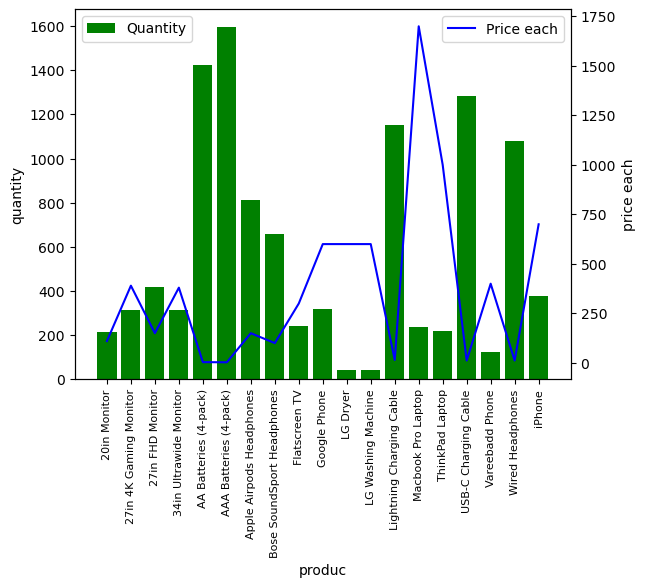

None


In [51]:
def map_price():   
    x=produc_i
    y1=all_products
    y2=price
    fig,ax1=plt.subplots()
    ax2=ax1.twinx()
    ax1.bar(x,y1,color='g')
    ax2.plot(x,y2,color='b')
    ax1.set_xticklabels(x,rotation=90,size=8)
    ax1.set_xlabel('produc')
    ax1.set_ylabel('quantity')
    ax2.set_ylabel('price each')
    ax1.legend(['Quantity'], loc='upper left')
    ax2.legend(['Price each'], loc='upper right')
    print(plt.show())
map_price()